In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/iND750.json', 'r') as file:
    models = json.loads(file.read())

## Data Preparation

In [4]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [5]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    if m['id'] == metabolite:
                        # exclude inorganic metabolites
                        if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                            if v > 0 and metabolite not in genes[gene['id']]['products']:
                                genes[gene['id']]['products'].append(metabolite)
                            if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                genes[gene['id']]['substrates'].append(metabolite)
                        elif metabolite not in inorganics:
                            inorganics.append(metabolite)
                        else:
                            break
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [6]:
df = pd.DataFrame.from_dict(genes).T
df

reactions  \
YER061C    [ACOATAm, FAS100ACPm, FAS120ACPm, FAS140ACPm, ...   
YLR304C                                      [ACONT, ACONTm]   
YPL231W    [FA120ACPHi, FA140ACPHi, FA141ACPHi, FA160ACPH...   
YBR023C                                              [CHTNS]   
YJL200C                                             [ACONTm]   
...                                                      ...   
YDR322C_A                                           [ATPS3m]   
YOL077W_A                                           [ATPS3m]   
YML081C_A                                           [ATPS3m]   
YHR001W_A                                         [CYOR_u6m]   
YCR073W_A                                              [PGL]   

                                                  substrates  \
YER061C    [ACP_m, accoa_m, malACP_m, nadph_m, ocACP_m, d...   
YLR304C                                       [cit_c, cit_m]   
YPL231W    [ddcaACP_c, myrsACP_c, tdeACP_c, palmACP_c, hd...   
YBR023C                                         [udpacgal_c]   
YJL200C                                              [cit_m]   
...                                                      ...   
YDR322C_A                                            [adp_m]   
YOL077W_A                                            [adp_m]   
YML081C_A                                            [adp_m]   
YHR001W_A                                 [ficytc_m, q6h2_m]   
YCR073W_A                                           [6pgl_c]   

                                                    products  \
YER061C    [acACP_m, coa_m, ACP_m, dcaACP_m, nadp_m, ddca...   
YLR304C                                     [icit_c, icit_m]   
YPL231W    [ACP_c, ddca_c, ttdca_c, ttdcea_c, hdca_c, hdc...   
YBR023C                                    [chitin_c, udp_c]   
YJL200C                                             [icit_m]   
...                                                      ...   
YDR322C_A                                            [atp_m]   
YOL077W_A                                            [atp_m]   
YML081C_A                                            [atp_m]   
YHR001W_A                                   [focytc_m, q6_m]   
YCR073W_A                                           [6pgc_c]   

                                                       links  
YER061C    [YOR221C, YKL055C, YKL192C, YPL148C, YAR035W, ...  
YLR304C    [YLR174W, YER065C, YBR291C, YOR136W, YNL037C, ...  
YPL231W    [YKL182W, YKL182W, YNR016C, YGR037C, YKL182W, ...  
YBR023C        [YLR307W, YLR308W, YKL067W, YER070W, YJL026W]  
YJL200C                 [YBR291C, YOR136W, YNL037C, YDL066W]  
...                                                      ...  
YDR322C_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YOL077W_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YML081C_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YHR001W_A  [YHR051W, YMR256C, Q0250, YGL187C, YDL067C, YG...  
YCR073W_A                                 [YGR256W, YHR183W]  

[750 rows x 4 columns]

In [7]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

index    links
0       YER061C  YOR221C
1       YER061C  YKL055C
2       YER061C  YKL192C
3       YER061C  YPL148C
4       YER061C  YAR035W
...         ...      ...
8921  YHR001W_A  YMR118C
8922  YHR001W_A  YJL045W
8923  YHR001W_A  YDR178W
8924  YCR073W_A  YGR256W
8925  YCR073W_A  YHR183W

[8926 rows x 2 columns]

In [8]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [9]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [10]:
giant = max(connected_component_subgraphs(G), key=len)

In [11]:
giant.number_of_nodes()

684

### Gene expression data

In [12]:
dg = pd.read_csv('../data/GDS3751_full.soft', sep='\t', skiprows=range(0, 70), header=0, skipfooter=1)
dg

/Users/YuhouZhou/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


ID_REF  IDENTIFIER   GSM432203   GSM432204   GSM432205  \
0                 1769308_at        FOX2  2367.99000  2282.47000  2209.29000   
1                 1769309_at        hht3     9.69602     9.92092    11.29290   
2                 1769310_at  SPCC18.05c    25.67930    24.44370    17.49750   
3                 1769311_at     YDL157C  2313.45000  2278.53000  2165.35000   
4                 1769312_at        PCL6   749.71600   685.25400   735.17700   
...                      ...         ...         ...         ...         ...   
10923  RPTR-Sc-U89963-1_s_at   --control    20.35070    22.40130    14.51900   
10924    RPTR-Sc-X03453-1_at   --control     9.35548    12.32940    10.28280   
10925    RPTR-Sc-X58791-1_at   --control     2.40269     4.33652     6.92493   
10926  RPTR-Sc-X58791-1_s_at   --control    13.76400     8.13158    12.08810   
10927  RPTR-Sc-X58791-2_s_at   --control    21.47350    22.10080    19.32300   

        GSM432206   GSM432207   GSM432208  \
0      2990.06000  3044.98000  3230.71000   
1         9.20161     2.92569     6.14953   
2        20.62730    14.67180    20.78140   
3      1115.26000  1350.70000   976.05500   
4       741.63300   752.69800   740.32800   
...           ...         ...         ...   
10923    24.64630    19.35850    21.30660   
10924     9.28437     5.79754    10.47400   
10925     3.84734     6.20713     3.45586   
10926    16.20770     7.85324    11.25610   
10927    21.52850    19.56410    25.10890   

                                              Gene title Gene symbol  ...  \
0      bifunctional hydroxyacyl-CoA dehydrogenase/eno...        FOX2  ...   
1                                        histone H3 h3.3        hht3  ...   
2                     notchless-like protein (predicted)  SPCC18.05c  ...   
3                                   hypothetical protein     YDL157C  ...   
4                                                  Pcl6p        PCL6  ...   
...                                                  ...         ...  ...   
10923                                                NaN         NaN  ...   
10924                                                NaN         NaN  ...   
10925                                                NaN         NaN  ...   
10926                                                NaN         NaN  ...   
10927                                                NaN         NaN  ...   

       Platform_ORF  Platform_SPOTID  Chromosome location  \
0           YKR009C              NaN                  NaN   
1      SPBC1105.11c              NaN                  NaN   
2        SPCC18.05c              NaN                  NaN   
3           YDL157C              NaN                  NaN   
4           YER059W              NaN                  NaN   
...             ...              ...                  ...   
10923           NaN        --control                  NaN   
10924           NaN        --control                  NaN   
10925           NaN        --control                  NaN   
10926           NaN        --control                  NaN   
10927           NaN        --control                  NaN   

                                   Chromosome annotation  \
0      Chromosome XI, NC_001143.9 (454352..457054, co...   
1      Chromosome II, NC_003423.3 (3528800..3529657, ...   
2      Chromosome III, NC_003421.2 (1962945..1964811,...   
3      Chromosome IV, NC_001136.10 (174232..174588, c...   
4             Chromosome V, NC_001137.3 (272624..273886)   
...                                                  ...   
10923                                                NaN   
10924                                                NaN   
10925                                                NaN   
10926                                                NaN   
10927                                                NaN   

                                             GO:Function  \
0      3-hydroxyacyl-CoA dehydrogenase activity///cat...   
1                    

In [13]:
v0 = []
for i in df.index:
    for g in dg.dropna(subset=['Platform_ORF'])['Platform_ORF']:
        if i in g:
            v0.append(i)                                                                                                        

In [14]:
v0

['YER061C',
 'YLR304C',
 'YPL231W',
 'YBR023C',
 'YJL200C',
 'YNL192W',
 'YBR038W',
 'YKL182W',
 'YOL140W',
 'YKL188C',
 'YPL147W',
 'YBR291C',
 'YDL142C',
 'YAR071W',
 'YDR044W',
 'YOR100C',
 'YBR132C',
 'YPL117C',
 'YEL058W',
 'YER069W',
 'YPL148C',
 'YLR153C',
 'YMR062C',
 'YJL071W',
 'YAR035W',
 'YML042W',
 'YPR062W',
 'YNR001C',
 'YPR001W',
 'YAL054C',
 'YCL009C',
 'YCR032W',
 'YCR005C',
 'YNL141W',
 'YMR108W',
 'YNR033W',
 'YBL015W',
 'YJR103W',
 'YER060W',
 'YER060W',
 'YGL186C',
 'YBL039C',
 'YER056C',
 'YER056C',
 'YGL205W',
 'YDR226W',
 'YER170W',
 'YOL052C',
 'YOL052C',
 'YMR250W',
 'YJL005W',
 'YDL215C',
 'YHR051W',
 'YJR105W',
 'YDR400W',
 'YMR256C',
 'YOR375C',
 'YML022W',
 'YDR441C',
 'YAL062W',
 'YKL001C',
 'YCL040W',
 'YLR359W',
 'YGL187C',
 'YNL220W',
 'YDL067C',
 'YGL191W',
 'YMR300C',
 'YER055C',
 'YBR284W',
 'YDL171C',
 'YML035C',
 'YGL245W',
 'YIL111W',
 'YJL070C',
 'YDR354W',
 'YNL052W',
 'YER090W',
 'YOL033W',
 'YKL211C',
 'YLR395C',
 'YDR305C',
 'YBR153W',
 'YL

In [15]:
dg1 = dg.dropna(subset=['Platform_ORF'])[dg.dropna(subset=['Platform_ORF'])['Platform_ORF'].isin(v0)]
dg1

ID_REF IDENTIFIER  GSM432203  GSM432204  GSM432205  GSM432206  \
0      1769308_at       FOX2   2367.990   2282.470   2209.290   2990.060   
6      1769314_at       PHO8   2056.620   2289.730   2199.550   1653.970   
29     1769338_at       OAR1    567.666    579.191    590.681    298.337   
30     1769339_at       AMD1   1476.940   1358.480   1485.670   2238.390   
33     1769342_at       POT1   1523.640   1761.270   2370.880   1976.020   
...           ...        ...        ...        ...        ...        ...   
10618  1780155_at       PAN6   1504.570   1372.160   1475.140    766.158   
10663  1780201_at       MSW1    428.813    399.142    414.213    412.505   
10669  1780207_at       NIT2    470.005    412.377    430.747    356.273   
10671  1780209_at       KTR5    338.897    282.910    282.138    315.866   
10673  1780211_at       VMA3   8066.020   7732.000   7871.770   7013.420   

       GSM432207  GSM432208  \
0       3044.980   3230.710   
6       1667.340   2155.130   
29       153.281    397.097   
30      1573.050   2359.550   
33      1991.820   2399.080   
...          ...        ...   
10618    961.225    754.717   
10663    483.394    414.272   
10669    291.915    312.110   
10671    378.592    378.622   
10673   6729.140   6293.370   

                                              Gene title Gene symbol  ...  \
0      bifunctional hydroxyacyl-CoA dehydrogenase/eno...        FOX2  ...   
6                              alkaline phosphatase PHO8        PHO8  ...   
29     3-oxoacyl-[acyl-carrier-protein] reductase (NA...        OAR1  ...   
30                                         AMP deaminase        AMD1  ...   
33                          acetyl-CoA C-acyltransferase        POT1  ...   
...                                                  ...         ...  ...   
10618                 pantoate--beta-alanine ligase PAN6        PAN6  ...   
10663                       tryptophan--tRNA ligase MSW1        MSW1  ...   
10669                                 putative hydrolase        NIT2  ...   
10671                       putative mannosyltransferase        KTR5  ...   
10673       H(+)-transporting V0 sector ATPase subunit c        VMA3  ...   

      Platform_ORF  Platform_SPOTID  Chromosome location  \
0          YKR009C              NaN                  NaN   
6          YDR481C              NaN                  NaN   
29         YKL055C              NaN                  NaN   
30         YML035C              NaN                  NaN   
33         YIL160C              NaN                  NaN   
...            ...              ...                  ...   
10618      YIL145C              NaN                  NaN   
10663      YDR268W              NaN                  NaN   
10669      YJL126W              NaN                  NaN   
10671      YNL029C              NaN                  NaN   
10673      YEL027W              NaN                  NaN   

                                   Chromosome annotation  \
0      Chromosome XI, NC_001143.9 (454352..457054, co...   
6      Chromosome IV, NC_001136.10 (1418550..1420250,...   
29     Chromosome XI, NC_001143.9 (335321..336157, co...   
30     Chromosome XIII, NC_001145.3 (206428..208860, ...   
33     Chromosome IX, NC_001141.2 (40191..41444, comp...   
...                                                  ...   
10618  Chromosome IX, NC_001141.2 (76354..77283, comp...   
10663     Chromosome IV, NC_001136.10 (1004004..1005143)   
10669         Chromosome X, NC_001142.9 (184501..185424)   
10671  Chromosome XIV, NC_001146.8 (577205..578773, c...   
10673         Chromosome V, NC_001137.3 (100769..101251)   

                                             GO:Function  \
0      3-hydroxyacyl-CoA dehydrogenase activity///cat...   
6      alkaline phosphatase activity///alkaline phosp...   
29     3-oxo-pimeloyl-[acp] methyl ester reductase ac...   
30     AMP deaminase activity///AMP deaminase activit...   
33     acetyl-CoA C-acyltransferase activity///acetyl...  

In [16]:
dh = pd.DataFrame()
dh['c_avg'] = dg1[['GSM432203', 'GSM432204', 'GSM432205']].mean(axis=1)
dh['e_avg'] = dg1[['GSM432206', 'GSM432207', 'GSM432208']].mean(axis=1)
dh.index = dg1['Platform_ORF']

In [17]:
dh 

c_avg        e_avg
Platform_ORF                          
YKR009C       2286.583333  3088.583333
YDR481C       2181.966667  1825.480000
YKL055C        579.179333   282.905000
YML035C       1440.363333  2056.996667
YIL160C       1885.263333  2122.306667
...                   ...          ...
YIL145C       1450.623333   827.366667
YDR268W        414.056000   436.723667
YJL126W        437.709667   320.099333
YNL029C        301.315000   357.693333
YEL027W       7889.930000  6678.643333

[723 rows x 2 columns]

In [18]:
dh.index.isin(list(giant.nodes()))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [19]:
# genes in the nodes
dh1 = dh[dh.index.isin(list(giant.nodes()))]
dh1

c_avg        e_avg
Platform_ORF                          
YKR009C       2286.583333  3088.583333
YDR481C       2181.966667  1825.480000
YKL055C        579.179333   282.905000
YML035C       1440.363333  2056.996667
YIL160C       1885.263333  2122.306667
...                   ...          ...
YML082W        293.388333   206.296000
YOR108W        537.829667   319.509333
YIL145C       1450.623333   827.366667
YDR268W        414.056000   436.723667
YJL126W        437.709667   320.099333

[658 rows x 2 columns]

In [20]:
# these nodes are not includes in the gene expression data
giant1 = nx.Graph(giant)
giant1.remove_nodes_from(list(dh1.index))
giant1.nodes

NodeView(('Q0085', 'Q0080', 'Q0130', 'YDR322C_A', 'YOL077W_A', 'YML081C_A', 'Q0105', 'YHR001W_A', 'Q0250', 'YPL275W', 'YPL276W', 'YJR009C', 'YJR159W', 'YDR007W', 'Q0045', 'Q0275', 'YIL167W', 'YLR157C', 'YLR160C', 'YLR158C', 'YDR343C', 'YJR158W', 'YJL221C', 'YOR393W', 'YPL281C', 'YEL017C_A', 'YCR024C_A', 'YGR292W', 'YJR160C', 'YCR073W_A', 'YER060W_A'))

In [21]:
# double check
dg[dg['Platform_ORF'].isin(list(giant1.nodes))]

Empty DataFrame
Columns: [ID_REF, IDENTIFIER, GSM432203, GSM432204, GSM432205, GSM432206, GSM432207, GSM432208, Gene title, Gene symbol, Gene ID, UniGene title, UniGene symbol, UniGene ID, Nucleotide Title, GI, GenBank Accession, Platform_CLONEID, Platform_ORF, Platform_SPOTID, Chromosome location, Chromosome annotation, GO:Function, GO:Process, GO:Component, GO:Function ID, GO:Process ID, GO:Component ID]
Index: []

[0 rows x 28 columns]

### the new network

In [22]:
giant2 = nx.Graph(giant)
giant2.remove_nodes_from(list(giant1.nodes))
giant2.number_of_nodes()

653

In [23]:
# still 5 rows more than expected
len(dh1.index)

658

In [24]:
# some gene are duplicated
len(dh1.index.drop_duplicates(keep='first'))

653

In [25]:
# dulplicated genes
# For YNR072W:
# https://www.ncbi.nlm.nih.gov/geoprofiles/66721192
# https://www.ncbi.nlm.nih.gov/geoprofiles/66726327
dh1[dh1.index.isin(list(dh1[dh1.index.duplicated()].index))]

c_avg        e_avg
Platform_ORF                          
YNR072W        145.793000    71.922867
YEL069C        447.334333    73.626033
YDL247W        120.721333   290.156333
YJL219W        140.842667   228.562333
YDL247W        428.845000   821.190333
YEL069C        483.335333    73.431200
YNR072W        319.509333   149.976000
YAR075W          4.824720     7.086150
YJL219W         68.204600   124.740333
YAR075W       5473.333333  4775.350000

In [26]:
# full data of duplicated genes
dg[dg['Platform_ORF'].isin(list(dh1[dh1.index.duplicated()].index))]

ID_REF IDENTIFIER   GSM432203  GSM432204  GSM432205   GSM432206  \
1291   1770625_x_at      HXT17   104.65500   126.2570   206.4670    68.44650   
1813   1771165_x_at      HXT13   293.56400   391.3110   657.1280    56.77840   
4427     1773829_at       MPH2   129.99800   113.4450   118.7210   267.43400   
4559   1773970_s_at       HXT9   162.46800   127.5960   132.4640   220.03400   
5518   1774944_s_at       MPH2   440.79900   406.0150   439.7210   754.54500   
5920     1775358_at      HXT13   320.68200   410.0440   719.2800    56.53170   
6426   1775868_s_at      HXT17   226.81600   276.4120   455.3000   124.16600   
8219     1777712_at    YAR075W     5.21356     2.9648     6.2958     8.12902   
10338    1779871_at       HXT9    75.49390    62.6783    66.4416   127.48200   
10356  1779889_s_at    YAR075W  5307.18000  5655.9600  5456.8600  4865.11000   

       GSM432207   GSM432208                Gene title Gene symbol  ...  \
1291     63.6054    83.71670  hexose transporter HXT17       HXT17  ...   
1813     80.3848    83.71490  hexose transporter HXT13       HXT13  ...   
4427    306.6050   296.43000  alpha-glucoside permease        MPH2  ...   
4559    197.8350   267.81800   hexose transporter HXT9        HXT9  ...   
5518    852.5560   856.47000  alpha-glucoside permease        MPH2  ...   
5920     77.4605    86.30140  hexose transporter HXT13       HXT13  ...   
6426    178.6360   147.12600  hexose transporter HXT17       HXT17  ...   
8219      7.8699     5.25953                       NaN         NaN  ...   
10338   132.2600   114.47900   hexose transporter HXT9        HXT9  ...   
10356  5015.9200  4445.02000                       NaN         NaN  ...   

      Platform_ORF  Platform_SPOTID  Chromosome location  \
1291       YNR072W              NaN                  NaN   
1813       YEL069C              NaN                  NaN   
4427       YDL247W              NaN                  NaN   
4559       YJL219W              NaN                  NaN   
5518       YDL247W              NaN                  NaN   
5920       YEL069C              NaN                  NaN   
6426       YNR072W              NaN                  NaN   
8219       YAR075W              NaN                  NaN   
10338      YJL219W              NaN                  NaN   
10356      YAR075W              NaN                  NaN   

                                   Chromosome annotation  \
1291        Chromosome XIV, NC_001146.8 (772657..774351)   
1813   Chromosome V, NC_001137.3 (21537..23231, compl...   
4427            Chromosome IV, NC_001136.10 (5985..7814)   
4559            Chromosome X, NC_001142.9 (19497..21200)   
5518            Chromosome IV, NC_001136.10 (5985..7814)   
5920   Chromosome V, NC_001137.3 (21537..23231, compl...   
6426        Chromosome XIV, NC_001146.8 (772657..774351)   
8219                                                 NaN   
10338           Chromosome X, NC_001142.9 (19497..21200)   
10356                                                NaN   

                                             GO:Function  \
1291   fructose transmembrane transporter activity///...   
1813   fructose transmembrane transporter activity///...   
4427   alpha-glucoside transmembrane transporter acti...   
4559   fructose transmembrane transporter activity///...   
5518   alpha-glucoside transmembrane transporter acti...   
5920   fructose transmembrane transporter activity///...   
6426   fructose transmembrane transporter activity///...   
8219                                                 NaN   
10338  fructose transmembrane transporter activity///...   
10356                                                NaN   

                                              GO:Process  \
1291   carbohydrate transport///glucose import///hexo...   
1813   carbohydrate transport///glucose import///hexo...   
4427   carbohydrate transport///carbohydrate transpor...   
4559   carbohydrate transport///glucose import///hexo...   
5518   carbohydrate tra

### Final gene expression vectors

In [27]:
dh2 = dh1.groupby(dh1.index).first()
dh2.reindex(giant2.nodes())

c_avg        e_avg
Platform_ORF                          
YER061C       1177.763333  1015.779000
YOR221C       1133.786667  1243.043333
YKL055C        579.179333   282.905000
YKL192C       4649.233333  4098.486667
YPL148C        334.157000   364.980000
...                   ...          ...
YDR047W       2050.320000  1407.456667
YDR044W       4027.283333   603.280667
YBR021W        716.879333   194.871333
YHL016C        882.707667   607.216333
YBL042C       2841.023333   774.065667

[653 rows x 2 columns]

In [28]:
dh2['diff0'] = dh2.c_avg - dh2.e_avg
dh2

c_avg         e_avg        diff0
Platform_ORF                                         
YAL012W        4675.573333   4325.250000   350.323333
YAL023C        3239.223333   3476.276667  -237.053333
YAL038W       13391.433333  13008.100000   383.333333
YAL044C        4705.933333   4347.843333   358.090000
YAL054C        3042.036667   3947.746667  -905.710000
...                    ...           ...          ...
YPR160W        7641.356667   9108.350000 -1466.993333
YPR167C         241.770000    693.686333  -451.916333
YPR176C        1260.290000   1543.133333  -282.843333
YPR183W        4719.846667   3408.086667  1311.760000
YPR191W        4639.900000   2885.703333  1754.196667

[653 rows x 3 columns]

In [29]:
# replace name to fit the rest of the code
giant = giant2

## Laplacian and Eigen

In [30]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes()))
L.todense()

matrix([[  4,   0,   0, ...,   0,   0,   0],
        [  0,   1,   0, ...,   0,  -1,   0],
        [  0,   0, 134, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   3,   0,   0],
        [  0,  -1,   0, ...,   0,  12,   0],
        [  0,   0,   0, ...,   0,   0,  23]], dtype=int64)

In [31]:
eig = np.linalg.eig(L.todense())
eig

(array([ 1.43460648e+02+0.00000000e+00j,  1.35365775e+02+0.00000000e+00j,
         1.34000000e+02+0.00000000e+00j,  1.39000000e+02+0.00000000e+00j,
         1.39000000e+02+0.00000000e+00j,  9.73435766e+01+0.00000000e+00j,
         9.44231247e+01+0.00000000e+00j,  8.92974977e+01+0.00000000e+00j,
         8.32675670e+01+0.00000000e+00j,  8.04056470e+01+0.00000000e+00j,
         7.76590192e+01+0.00000000e+00j,  7.35625484e+01+0.00000000e+00j,
         7.22848613e+01+0.00000000e+00j,  6.86873177e+01+0.00000000e+00j,
         6.76550323e+01+0.00000000e+00j,  6.70981337e+01+0.00000000e+00j,
         6.80000000e+01+0.00000000e+00j,  6.33937237e+01+0.00000000e+00j,
         6.26520891e+01+0.00000000e+00j,  6.20316809e+01+0.00000000e+00j,
         6.06713512e+01+0.00000000e+00j,  5.99382835e+01+0.00000000e+00j,
         5.68724121e+01+0.00000000e+00j,  5.58887436e+01+0.00000000e+00j,
         5.52312708e+01+0.00000000e+00j,  5.90000000e+01+0.00000000e+00j,
         5.80000000e+01+0.00000000e+00

## Plotting

In [32]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)
    plt.title('k = {}'.format(k))

In [33]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [34]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [35]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot metabolic network

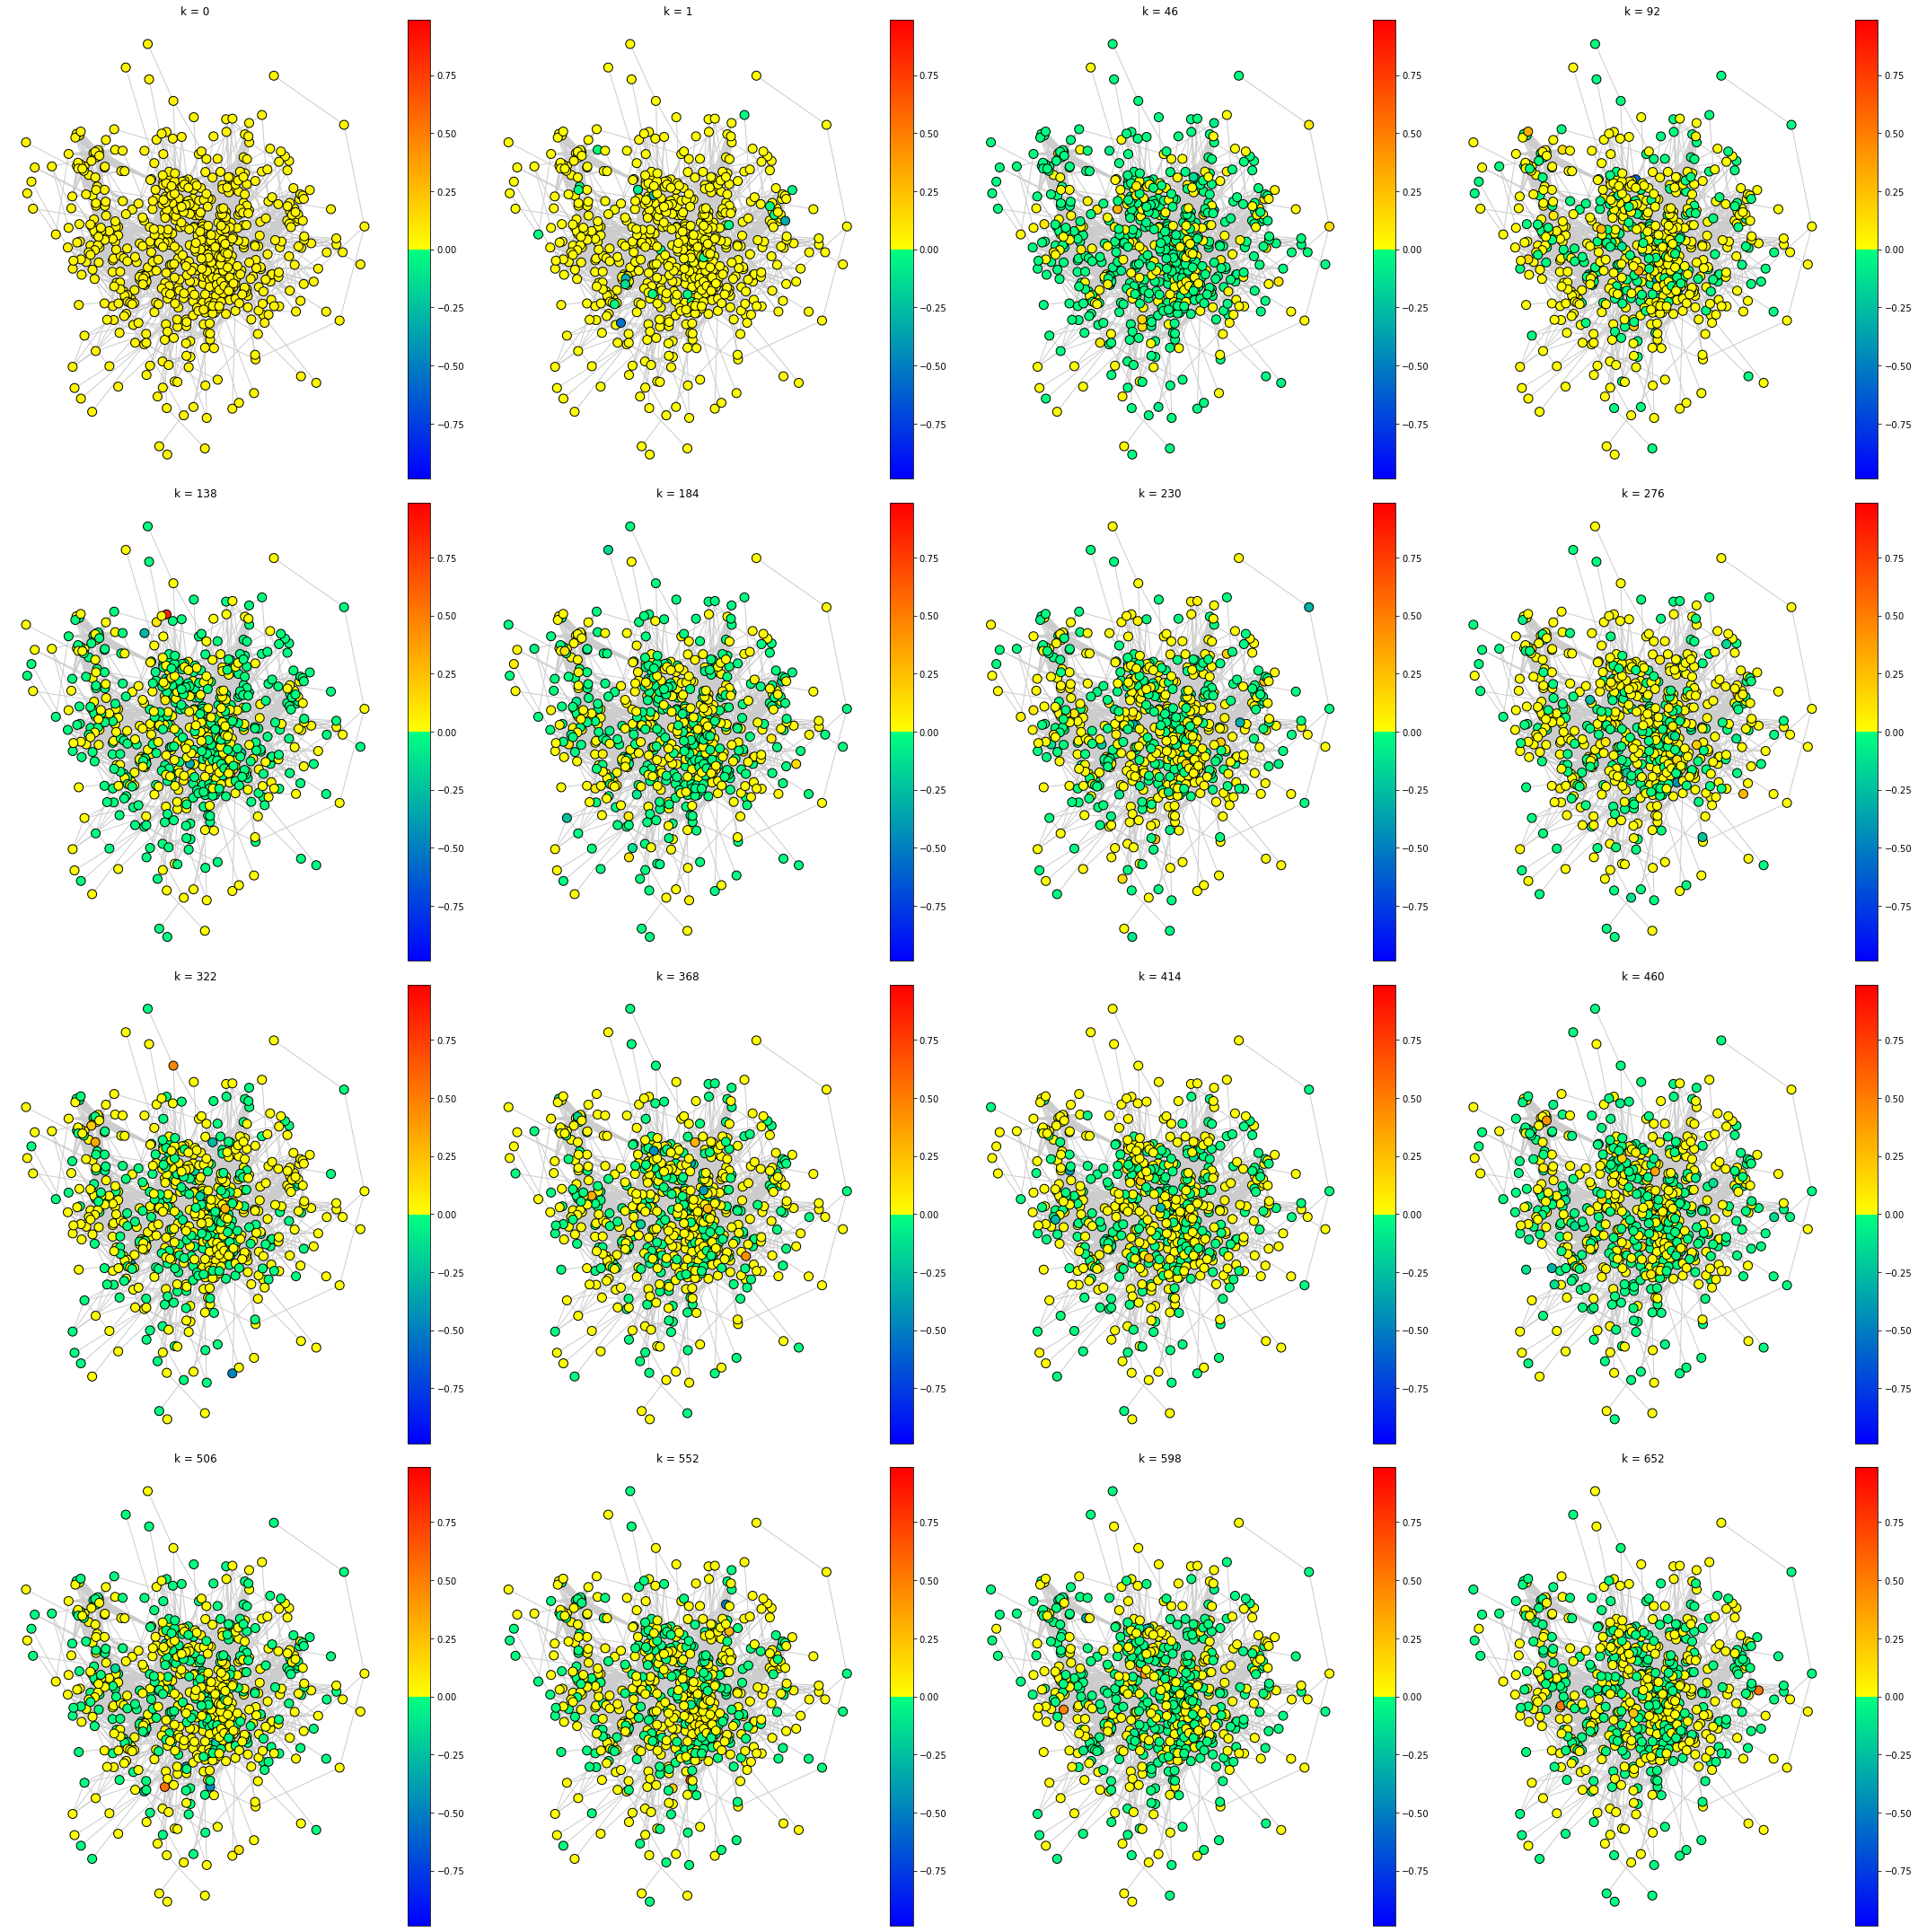

In [36]:
n0 = 4
n_sub = n0 ** 2
base = len(eig[0]) // (n_sub - 2)
k_lst0 = [0, 1]
k_lst1 = [x * base for x in range(1, n_sub-2)]
k_lst2 = [len(eig[0])-1]
k_lst = k_lst0 + k_lst1 + k_lst2
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(n0, n0, i+1)
    draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()

## Plot gene expression network

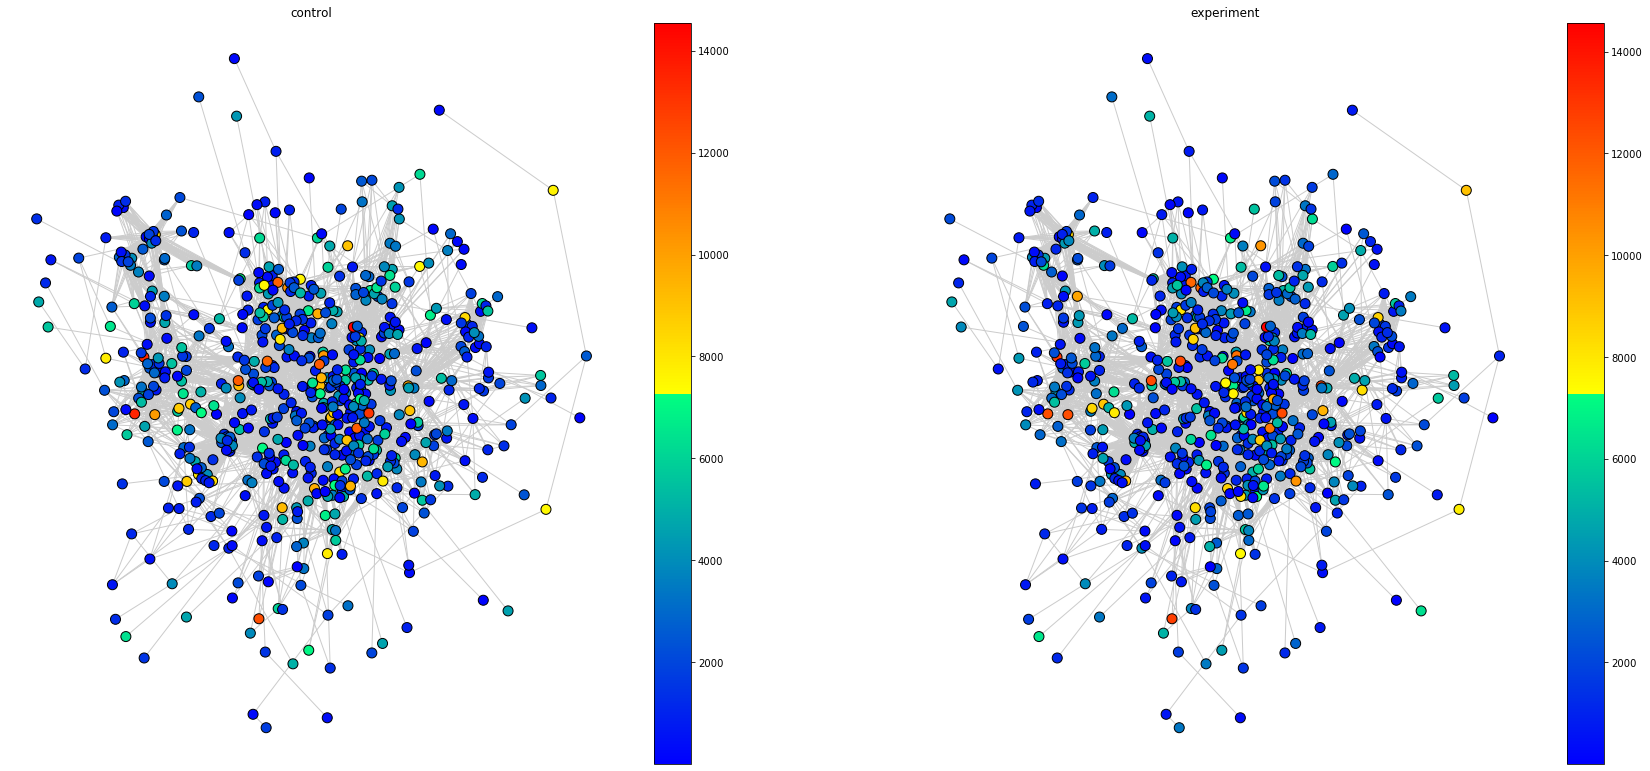

In [37]:
plt.subplot(2, 2, 1)
vec = dh2.c_avg
vmax_exp = np.max(vec)
vmin_exp = np.min(vec)
nx.draw(giant, layout, node_size=100, node_color=vec, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin_exp, vmax=vmax_exp)
plt.axis('off')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin_exp, vmax=vmax_exp))
sm.set_array([])
plt.colorbar(sm)
plt.title('control')

plt.subplot(2, 2, 2)
vec = dh2.e_avg
vmax_exp = np.max(vec)
vmin_exp = np.min(vec)
nx.draw(giant, layout, node_size=100, node_color=vec, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin_exp, vmax=vmax_exp)
plt.axis('off')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin_exp, vmax=vmax_exp))
sm.set_array([])
plt.colorbar(sm)
plt.title('experiment')

plt.show()
    

## Compute Correlation Coefficients

In [38]:
from scipy.stats import pearsonr, spearmanr
p_lst = []
ppv_lst = []
s_lst = []
spv_lst = []
for i in range(len(eig[1])):
    p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2.diff0)[0])
    ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2.diff0)[1])
    s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2.diff0)[0])
    spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2.diff0)[1])
i_p = np.argmax(np.abs(p_lst))
i_s = np.argmax(np.abs(s_lst))
print(i_p, i_s)
print((p_lst[i_p], ppv_lst[i_p]))
print((s_lst[i_s], spv_lst[i_s]))

236 236
(0.16338617701164881, 2.7242330200126107e-05)
(0.1897602896124568, 1.038158301811913e-06)


### Shuffle vector

In [39]:
dh2_shfl = dh2.sample(frac=1)
p_lst = []
ppv_lst = []
s_lst = []
spv_lst = []
for i in range(len(eig[1])):
    p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[0])
    ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[1])
    s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[0])
    spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[1])
i_p = np.argmax(np.abs(p_lst))
i_s = np.argmax(np.abs(s_lst))
print(i_p, i_s)
print((p_lst[i_p], ppv_lst[i_p]))
print((s_lst[i_s], spv_lst[i_s]))

119 262
(-0.1339285233782512, 0.0006006864645651504)
(0.12798487930934468, 0.001046450468320762)


### Draw distribution

In [40]:
n = 100
corr_lst = []
pv_lst = []
for _ in range(n):
    dh2_shfl = dh2.sample(frac=1)
    p_lst = []
    ppv_lst = []
    s_lst = []
    spv_lst = []
    for i in range(len(eig[1])):
        p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[0])
        ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[1])
        s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[0])
        spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], dh2_shfl.diff0)[1])
    i_p = np.argmax(np.abs(p_lst))
    i_s = np.argmax(np.abs(s_lst))
    
    ps = np.argmax([np.abs(p_lst[i_p]), np.abs(s_lst[i_s])])
    # use absolute value of corr coe
    corr_lst.append((np.abs(p_lst[i_p]), np.abs(s_lst[i_s]))[ps])
    pv_lst.append((ppv_lst[i_p], spv_lst[i_s])[ps])



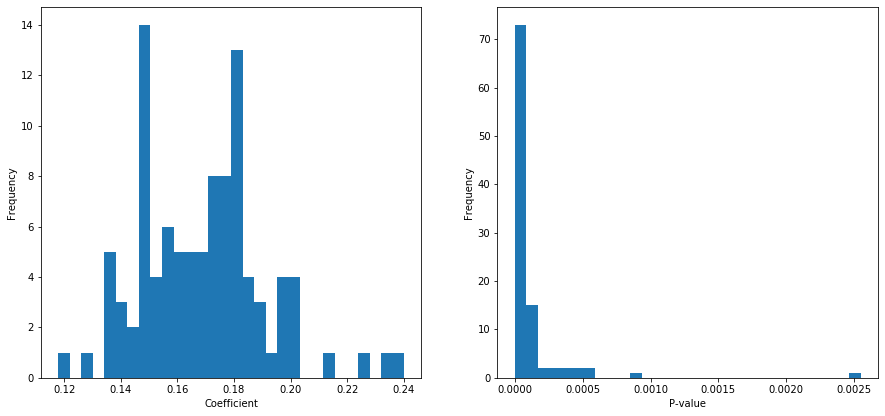

In [44]:
plt.rc('figure', figsize=(15, 15))
plt.subplot(2,2,1)
plt.hist(corr_lst, bins=30)
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
plt.hist(pv_lst, bins=30)
plt.xlabel('P-value')
plt.ylabel('Frequency')
# plt.xscale('log')
plt.show()